In [86]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('dojo_data/sales_predictions.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df['Item_Type'].nunique()

16

In [6]:
sales = df[['Item_Type', 'Item_MRP']]
sales.nunique()

Item_Type      16
Item_MRP     5938
dtype: int64

In [7]:
sales.shape

(8523, 2)

In [8]:
sales.isnull().sum()

Item_Type    0
Item_MRP     0
dtype: int64

Which item has the best sale sum(), which items were sold the most(top 3~5)

In [9]:
sales.sort_values(by = ['Item_Type', 'Item_MRP'], ascending=[True, False],inplace=True)

<ipython-input-9-d0e4af9fab83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales.sort_values(by = ['Item_Type', 'Item_MRP'], ascending=[True, False],inplace=True)


In [10]:
sales

,Item_Type,Item_MRP
7085,Baking Goods,265.5568
7675,Baking Goods,265.1568
2993,Baking Goods,263.9568
5392,Baking Goods,263.8568
6893,Baking Goods,262.9568
...,...,...
1425,Starchy Foods,36.6532
6246,Starchy Foods,34.6532
1799,Starchy Foods,34.5532
6865,Starchy Foods,34.3532


In [11]:
#The percentge of each items among all the sale items
sales['Item_MRP'].value_counts(normalize=True)

172.0422    0.000821
188.1872    0.000704
196.5084    0.000704
170.5422    0.000704
196.5768    0.000704
              ...   
139.9154    0.000117
74.9696     0.000117
230.6668    0.000117
147.0102    0.000117
56.1956     0.000117
Name: Item_MRP, Length: 5938, dtype: float64

In [12]:
sales['Item_Type'].sort_values()

7085     Baking Goods
2835     Baking Goods
5942     Baking Goods
6866     Baking Goods
8416     Baking Goods
            ...      
4378    Starchy Foods
4942    Starchy Foods
3400    Starchy Foods
2732    Starchy Foods
6037    Starchy Foods
Name: Item_Type, Length: 8523, dtype: object

What is the MRP looks like?

In [13]:
# what is sale price look like?
sales['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [14]:
#Split df up and group by item names
item = sales.groupby(['Item_Type'])
item

In [15]:
item['Item_MRP'].value_counts().loc['Fruits and Vegetables']

Item_MRP
89.8856     3
100.1016    3
131.2968    3
139.9838    3
147.3734    3
           ..
262.0252    1
262.1252    1
262.6252    1
263.9252    1
264.2252    1
Name: Item_MRP, Length: 1110, dtype: int64

In [16]:
item['Item_MRP'].agg(['median', 'mean']).loc['Baking Goods']

median    112.354400
mean      126.380766
Name: Baking Goods, dtype: float64

In [17]:
filt_f_n_v = df['Item_Type'] == 'Fruits and Vegetables'
df[filt_f_n_v].sort_values(by = 'Item_MRP').describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,1019.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,13.224769,0.068513,144.581235,1997.719968,2289.009592
std,4.575275,0.052680,60.475899,8.401984,1799.503459
min,5.460000,0.000000,36.250600,1985.000000,45.274400
25%,9.195000,0.030059,98.391000,1987.000000,884.848200
50%,13.100000,0.054126,145.544400,1999.000000,1830.950000
75%,17.100000,0.100441,188.479300,2004.000000,3227.132600
max,21.350000,0.321115,264.225200,2009.000000,12117.560000


In [18]:
df[filt_f_n_v].sort_values(by = 'Item_MRP')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7649,FDD08,8.300,Low Fat,0.035409,Fruits and Vegetables,36.2506,OUT049,1999,Medium,Tier 1,Supermarket Type1,834.9132
5976,FDF09,6.215,Low Fat,0.012174,Fruits and Vegetables,36.4848,OUT045,2002,NaN,Tier 2,Supermarket Type1,447.4176
4708,FDD08,8.300,Low Fat,0.035498,Fruits and Vegetables,36.6506,OUT018,2009,Medium,Tier 3,Supermarket Type2,455.4072
8393,FDT20,10.500,Low Fat,0.041479,Fruits and Vegetables,36.8164,OUT045,2002,NaN,Tier 2,Supermarket Type1,772.3280
1731,FDE32,20.700,Low Fat,0.048759,Fruits and Vegetables,37.3506,OUT046,1997,Small,Tier 1,Supermarket Type1,834.9132
...,...,...,...,...,...,...,...,...,...,...,...,...
6493,FDS56,5.785,Regular,0.038750,Fruits and Vegetables,262.0252,OUT035,2004,Small,Tier 2,Supermarket Type1,4459.5284
7682,FDS56,5.785,Regular,0.064871,Fruits and Vegetables,262.1252,OUT010,1998,NaN,Tier 3,Grocery Store,786.9756
5048,FDS56,5.785,Regular,0.038817,Fruits and Vegetables,262.6252,OUT049,1999,Medium,Tier 1,Supermarket Type1,524.6504
3313,FDS56,5.785,Regular,0.038725,Fruits and Vegetables,263.9252,OUT013,1987,High,Tier 3,Supermarket Type1,6033.4796


In [19]:
df[filt_f_n_v].sort_values(by = 'Outlet_Establishment_Year')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3320,FDU32,NaN,Low Fat,0.025842,Fruits and Vegetables,120.7414,OUT027,1985,Medium,Tier 3,Supermarket Type3,4386.2904
911,FDM56,NaN,Low Fat,0.122896,Fruits and Vegetables,111.1912,OUT019,1985,Small,Tier 1,Grocery Store,218.3824
1805,FDJ56,NaN,Low Fat,0.321115,Fruits and Vegetables,100.7700,OUT019,1985,Small,Tier 1,Grocery Store,199.7400
6241,FDV19,NaN,Regular,0.061731,Fruits and Vegetables,159.1578,OUT019,1985,Small,Tier 1,Grocery Store,160.4578
7230,FDW07,NaN,Regular,0.141998,Fruits and Vegetables,90.5514,OUT027,1985,Medium,Tier 3,Supermarket Type3,2036.6822
...,...,...,...,...,...,...,...,...,...,...,...,...
4030,FDH57,10.895,Low Fat,0.035893,Fruits and Vegetables,131.3284,OUT018,2009,Medium,Tier 3,Supermarket Type2,1318.2840
6801,FDQ31,5.785,Regular,0.054067,Fruits and Vegetables,87.0856,OUT018,2009,Medium,Tier 3,Supermarket Type2,1406.1696
1852,FDG57,14.700,Low Fat,0.072593,Fruits and Vegetables,48.5034,OUT018,2009,Medium,Tier 3,Supermarket Type2,874.8612
5019,FDX20,7.365,Low Fat,0.042734,Fruits and Vegetables,226.9720,OUT018,2009,Medium,Tier 3,Supermarket Type2,3848.3240


In [20]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
item_sum = df.groupby("Item_Type").sum().sort_values(by = 'Item_MRP')
item_sum

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Type,,,,,
Seafood,640.195,4.798469,9077.8700,127855,1.488682e+05
Breakfast,1136.370,9.429531,15596.6966,219707,2.322990e+05
Starchy Foods,1779.795,9.999407,21880.0274,295790,3.514013e+05
Others,1897.900,10.180734,22451.8916,337605,3.255176e+05
Hard Drinks,2086.260,13.897707,29334.6766,427610,4.577934e+05
Breads,2314.775,16.630030,35379.1198,501412,5.532372e+05
Soft Drinks,4430.950,28.467650,58514.1650,889154,8.928977e+05
Meat,4319.445,26.470620,59449.8638,848870,9.175656e+05
Health and Hygiene,5651.195,28.712309,68025.8388,1038822,1.045200e+06


In [22]:
#top 5 popular item_types 
filt_top_popular_items = item_sum['Item_MRP'] > 90706.7270
top5_item = item_sum[filt_top_popular_items]

<AxesSubplot:ylabel='Item_Type'>

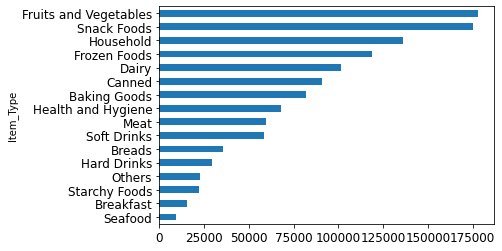

In [23]:
item_sum['Item_MRP'].plot(kind="barh", fontsize=12)

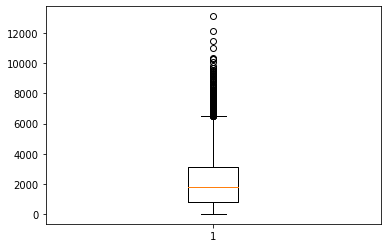

In [24]:
plt.boxplot(df['Item_Outlet_Sales']);

In [25]:
out_yrs = df.groupby("Outlet_Establishment_Year").sum().sort_values(by = ['Outlet_Establishment_Year','Item_Outlet_Sales'], ascending=[True,False])
out_yrs

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Outlet_Establishment_Year,,,,
1985,0.000,112.061805,204522.2570,3.633620e+06
1987,12121.730,55.879859,131809.0156,2.142664e+06
1997,11966.125,56.231875,132113.3698,2.118395e+06
1998,7166.800,56.308832,78131.5646,1.883402e+05
1999,12013.225,56.549156,130476.8598,2.183970e+06
2002,11751.840,56.180780,130942.7782,2.036725e+06
2004,11931.295,56.974873,133103.9070,2.268123e+06
2007,11877.495,56.834646,129103.9564,2.167465e+06
2009,11946.465,56.621454,131477.7724,1.851823e+06


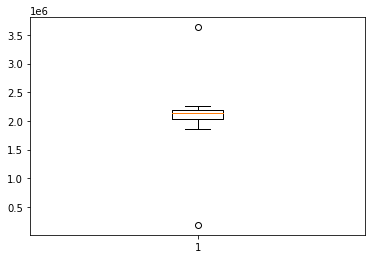

In [26]:
plt.boxplot(out_yrs['Item_Outlet_Sales']);

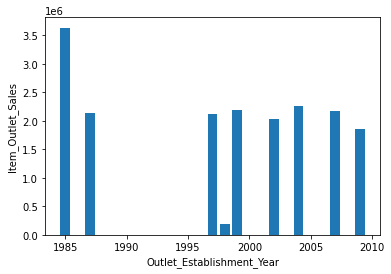

In [27]:
x_out_yrs = (1985, 1987, 1997, 1998, 1999,2002, 2004 ,2007 ,2009)
y_out_yrs = out_yrs['Item_Outlet_Sales']

plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')

plt.bar(x_out_yrs, y_out_yrs);

In [28]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [29]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [30]:
df.corr().sort_values(by = ['Item_Outlet_Sales'])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

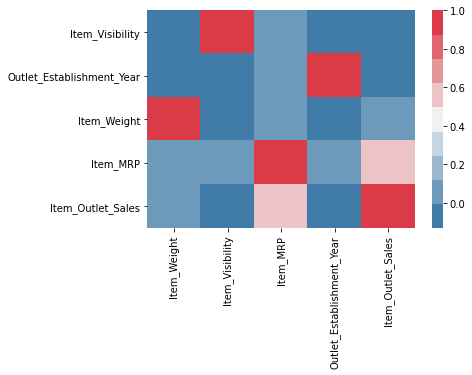

In [31]:
sns.heatmap(df.corr().sort_values(by = ['Item_Outlet_Sales']), cmap = sns.diverging_palette(240, 10, n=9))

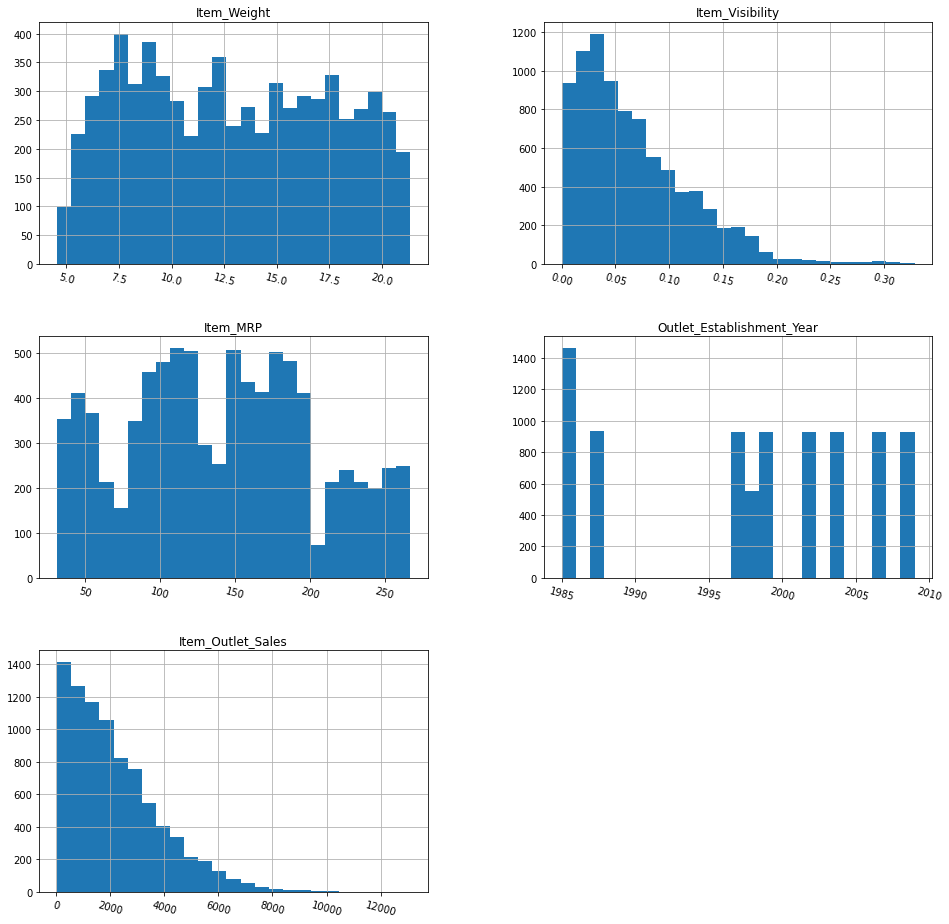

In [32]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

In [70]:
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.072238      2
0.080766      2
0.058543      2
           ... 
0.024343      1
0.041823      1
0.023154      1
0.047783      1
0.031007      1
Name: Item_Visibility, Length: 7880, dtype: int64

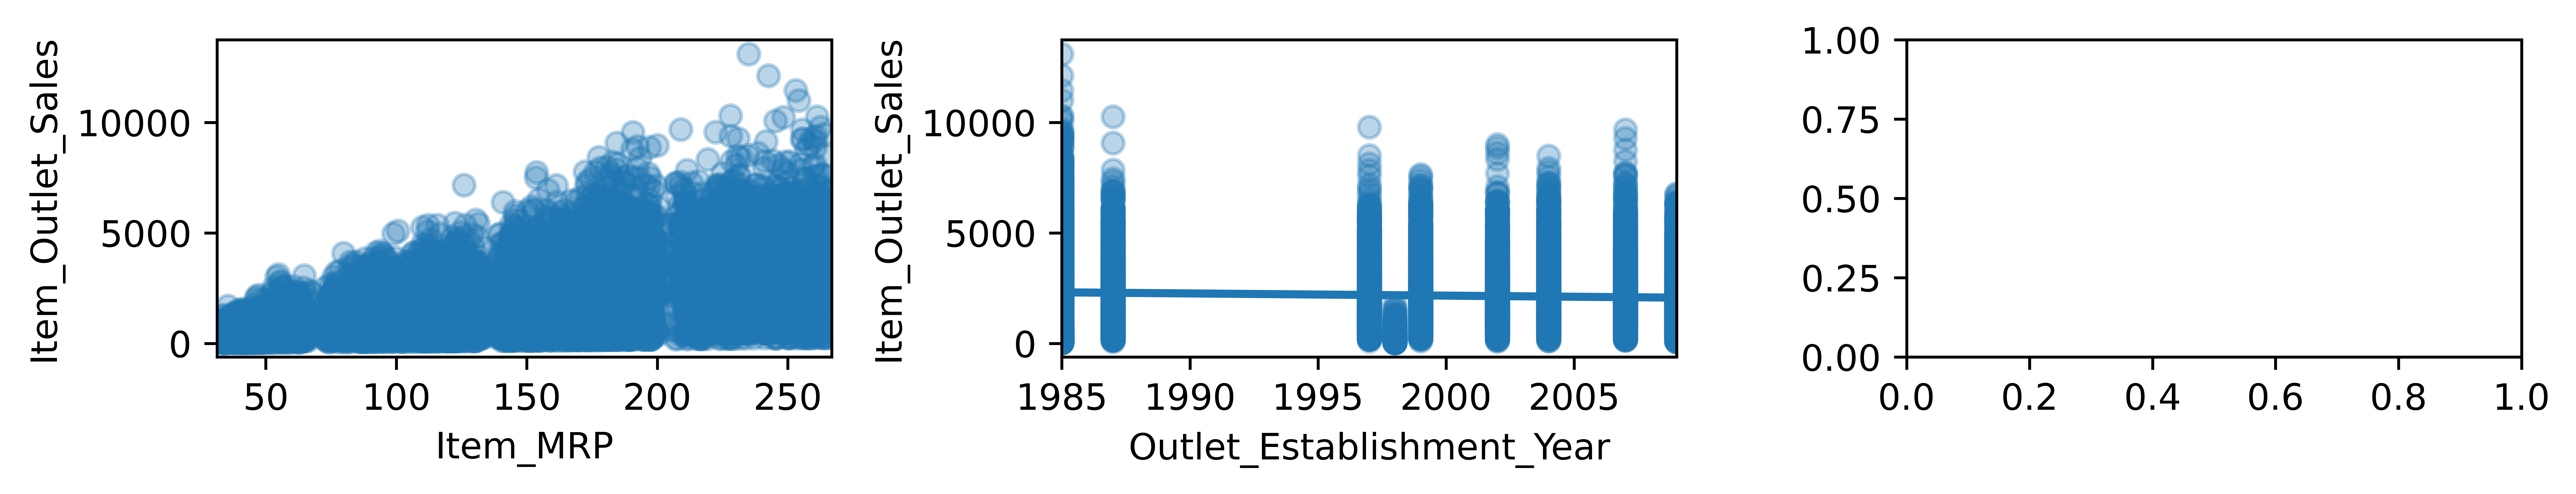

In [33]:
"""
You can use seaborn to see if you have linear relationships between each feature variable and the target
"""
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=1000)
sns.regplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
fig.tight_layout()

In [34]:
# feature matrix (should be a NumPy array)
# values converts dataframe to Num
X = df.loc[:, ['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']].values

In [35]:
X[0:10]

array([[1.60473010e-02, 2.49809200e+02, 1.99900000e+03],
       [1.92782160e-02, 4.82692000e+01, 2.00900000e+03],
       [1.67600750e-02, 1.41618000e+02, 1.99900000e+03],
       [0.00000000e+00, 1.82095000e+02, 1.99800000e+03],
       [0.00000000e+00, 5.38614000e+01, 1.98700000e+03],
       [0.00000000e+00, 5.14008000e+01, 2.00900000e+03],
       [1.27410890e-02, 5.76588000e+01, 1.98700000e+03],
       [1.27469857e-01, 1.07762200e+02, 1.98500000e+03],
       [1.66871140e-02, 9.69726000e+01, 2.00200000e+03],
       [9.44495900e-02, 1.87821400e+02, 2.00700000e+03]])

In [36]:
X.shape

(8523, 3)

In [37]:
# target vector
y = df.loc[:, 'Item_Outlet_Sales'].values

In [38]:
y.shape

(8523,)

In [39]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

In [40]:
reg.fit(X,y)

LinearRegression()

In [41]:
# Save predictions
preds = reg.predict(X)

In [42]:
reg.predict(X[0].reshape(-1,3))

array([4078.87868503])

In [43]:
reg.predict(X[0:10])

array([4078.87868503,  803.22974774, 2392.64994645, 3108.41053062,
       1252.30766711,  936.43466881, 1255.54471971, 1557.42506072,
       1660.57800992, 2670.00543952])

In [44]:
score = reg.score(X, y)
print(score)

0.34230383956563726


In [45]:
# Make a mean_squared_error instance
reg_mse = mean_squared_error

In [54]:
# By hand:
np.sum((y - preds)**2)/len(preds)

1915079.1920935214

In [56]:
mean_squared_error(y, preds)

1915079.1920935214

In [55]:
reg_mse(y,preds)

1915079.1920935214

In [48]:
# Coefficient of Determination/R2:
# Using the model:
reg.score(X, y)

0.34230383956563726

In [47]:
# Using sklearn:
r2_score(y, preds)

0.34230383956563726

In [49]:
# By hand:
np.sum(np.abs(y - preds))/len(preds)

1022.357994868251

In [50]:
#MAE
# Using sklearn
mean_absolute_error(y, preds)

1022.357994868251

In [81]:
#RMSE
# By hand:
np.sqrt(np.sum((y - preds)**2)/len(preds))

1383.8638632804607

In [57]:
# Using sklearn:
np.sqrt(mean_squared_error(y, preds))

1383.8638632804607

In [58]:
#MSE
# Using sklearn:
mean_squared_error(y, preds)

1915079.1920935214

In [59]:
# Using sklearn:
np.sqrt(mean_squared_error(y, preds))

1383.8638632804607

In [60]:
scaler = StandardScaler()
# Fit on X (assuming your features matrix is a NumPy array)
scaler.fit(X)
# Transform X
scaler.transform(X)

array([[-0.97073217,  1.74745381,  0.13954076],
       [-0.90811123, -1.48902325,  1.33410274],
       [-0.95691733,  0.01004021,  0.13954076],
       ...,
       [-0.59978449, -0.89720755,  0.73682175],
       [ 1.53287976, -0.60797692,  1.33410274],
       [-0.41193591, -1.05226104, -0.09937163]])

In [75]:
#K-Nearest Neighbors. Make an instance of the Model
knn = KNeighborsRegressor(n_neighbors=3)

In [76]:
# Looking at some hyperparameters that seem tunable
print(knn)

KNeighborsRegressor(n_neighbors=3)


In [77]:
#Model is learning the relationship between x and y
knn.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [78]:
predictions = knn.predict(X)

In [79]:
score = knn.score(X, y)

In [80]:
score

0.6170205357065119

In [ ]:
#train_test_split(*arrays, test_size=.25, train_size=.75, random_state=None, shuffle=True, stratify=None)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3# List of values to try for n_estimators:
estimator_range = [1] + list(range(10, 310, 10)), test_size=.25, train_size=.75)

In [87]:
clf = RandomForestRegressor(n_estimators=100,
                             bootstrap=True,
                             oob_score=True)

In [88]:
#rel x and y
clf.fit(X_train, y_train)

RandomForestRegressor(oob_score=True)

In [90]:
clf.predict(X_test[0:10])

array([3033.531276, 1090.68027 ,  708.058326, 1719.255392,  432.723394,
        590.5646  , 2053.320542,  738.898182,  933.391678, 1847.681554])

In [95]:
# The class imbalance is not that extreme for our dataset
# Since class labels are required in order to determine the degree of class imbalance,
#  class imbalance is typically gauged with respect to the training distribution
#y_train, first col
pd.DataFrame(y_train)[0].value_counts(dropna = False).head(20)

703.0848     13
1278.3360    13
1845.5976    12
1342.2528    12
958.7520     12
1230.3984    11
759.0120     11
1406.1696    10
1211.7560    10
1518.0240    10
679.1160     10
1416.8224     9
539.2980      9
452.7440      9
3415.5540     9
2696.4900     9
852.2240      9
1298.3100     9
575.2512      9
755.0172      9
Name: 0, dtype: int64

In [ ]:
# Null accuracy by predicing the most frequent class


In [96]:
#Accruracy score
score = clf.score(X_test, y_test)
score

0.3892267931827691

In [97]:
score_train = clf.score(X_train, y_train)
score_train

0.9101204667618386

Choose all the X col, to see if other features that will do a better job predicitng the target.

In [99]:
# List of values to try for n_estimators:
estimator_range = [1] + list(range(10, 310, 10))
estimator_range

[1,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300]

In [101]:
# List to store the average accuracies for each value of n_estimators:
scores = []
# Use train test split with each value of n_estimators (Warning: Slow!).
for estimator in estimator_range:
    clf = RandomForestRegressor(n_estimators=estimator,
                                 random_state=1,
                                 bootstrap=True)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

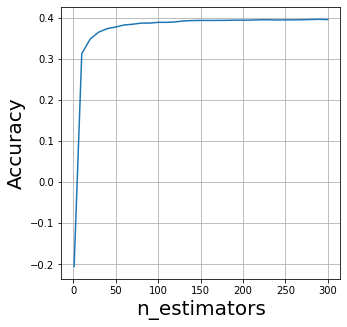

In [103]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =20);
axes.set_ylabel('Accuracy', fontsize = 20);
axes.grid()